Fitting using Ikeda Carpenter function was not successful

In [1]:
import os, sys, glob, numpy as np
import matplotlib as mpl, matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
ls -lt /SNS/ARCS/2009_2_18_SCI/shared/C4H2I2S/C4H2I2S_50K_100meV/

total 495104
-rw-rwxr-- 1 snsdata users   4180486 Jul 22  2013 slice_n_c_m3_C4H2I2S_50K_100meV.phx*
-rw-rwxr-- 1 snsdata users 356234428 Jul 22  2013 slice_n_c_m3_C4H2I2S_50K_100meV.spe*
-rw-rwxr-- 1 snsdata users    956616 Jul 22  2013 smask_C4H2I2S_50K_100meV.h5*
-rw-rwxr-- 1 snsdata users  12010784 Jul 22  2013 ipdpe_C4H2I2S_50K_100meV.h5*
-rw-rwxr-- 1 snsdata users  36107344 Jul 22  2013 ipdpe_n_C4H2I2S_50K_100meV.h5*
-rw-rwxr-- 1 snsdata users  49515822 Jul 22  2013 ipdpe_n_c_C4H2I2S_50K_100meV.h5*
-rw-rwxr-- 1 snsdata users  45845468 Jul 22  2013 ipdpe_n_c_m3_C4H2I2S_50K_100meV.h5*
-rw-rwxr-- 1 snsdata users    682887 Jul 22  2013 iphie_n_c_m3_C4H2I2S_50K_100meV.h5*
-rw-rwxr-- 1 snsdata users    908192 Jul 22  2013 iqe_n_c_m3_C4H2I2S_50K_100meV.h5*


In [5]:
import histogram.hdf as hh, histogram as H
from multiphonon import sqe

In [6]:
iqe = hh.load('/SNS/ARCS/2009_2_18_SCI/shared/C4H2I2S/C4H2I2S_50K_100meV/iqe_n_c_m3_C4H2I2S_50K_100meV.h5')

<IPython.core.display.Javascript object>


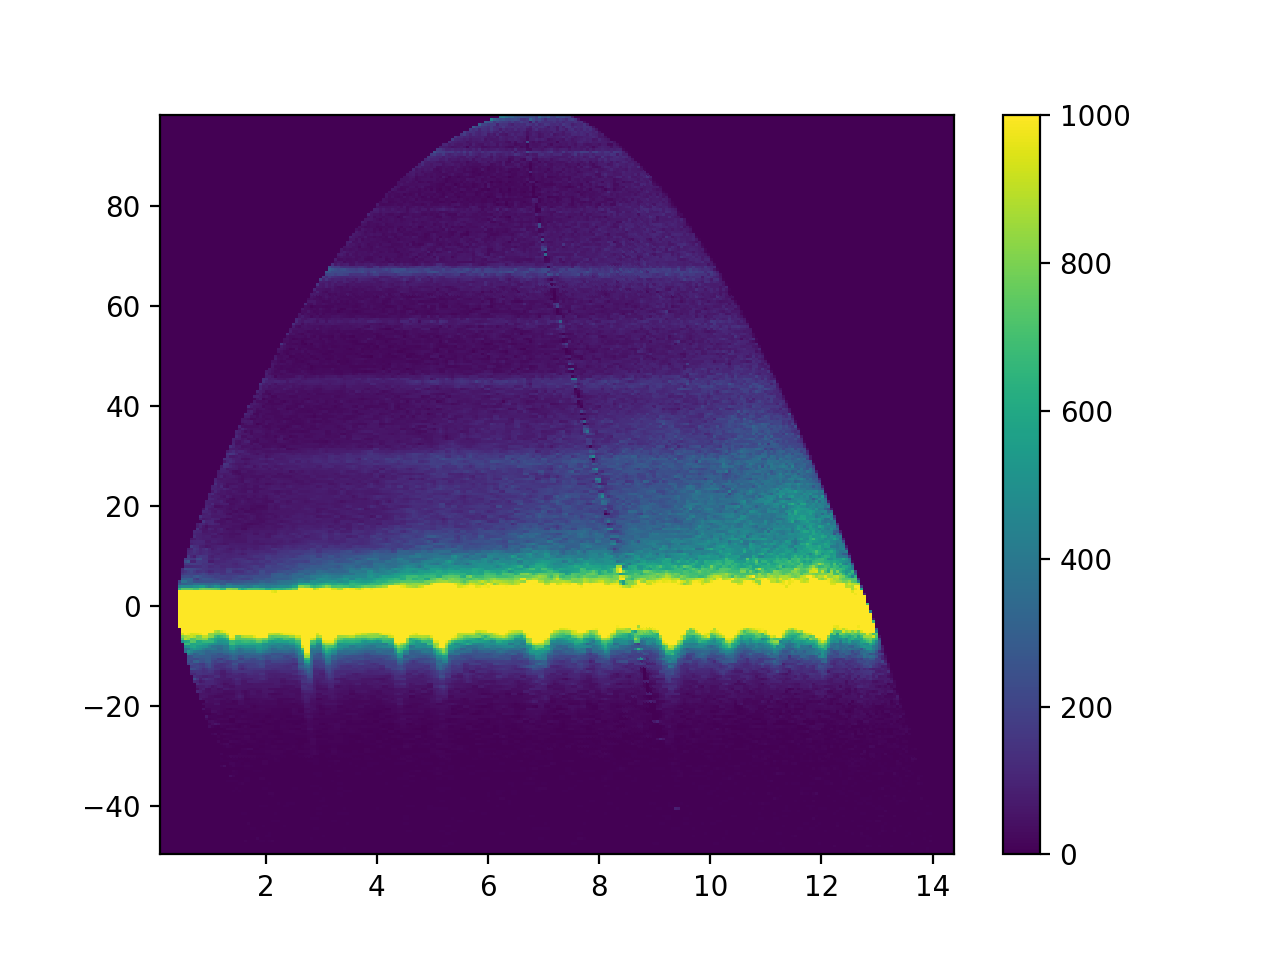

In [7]:
plt.figure()
sqe.plot(iqe)
plt.clim(0, 1000)

In [8]:
ie = iqe[(5,9), ()].sum('Q')

<IPython.core.display.Javascript object>


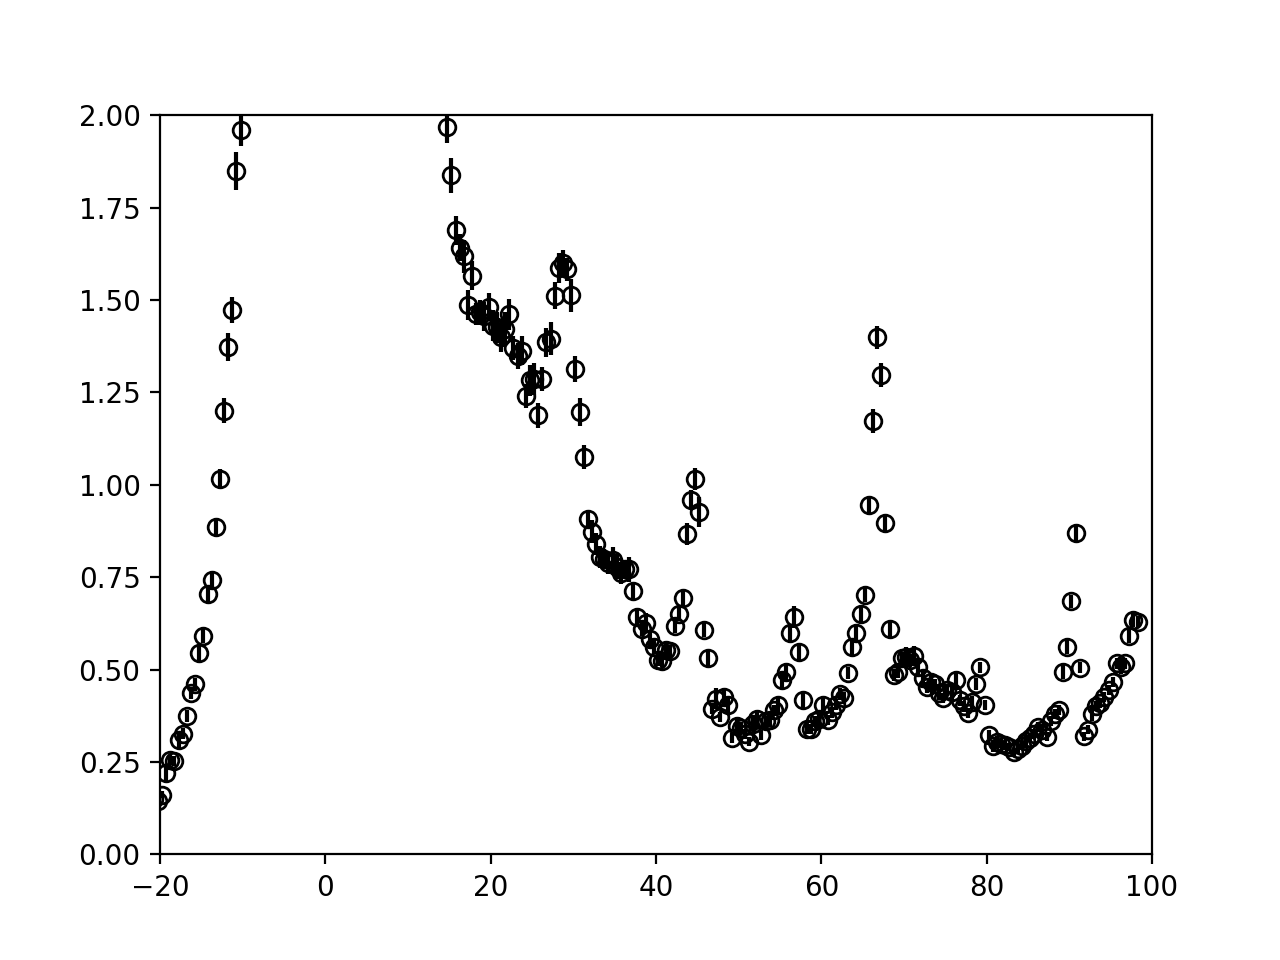

(0, 2)

In [9]:
plt.figure()
plt.errorbar(ie.energy, ie.I/1e4, ie.E2**.5/1e4, fmt='o', markerfacecolor='none', color='k')
plt.xlim(-20, 100)
plt.ylim(0, 2)

# Fit

First try the elastic peak

In [10]:
from dgsres import icg

In [14]:
import lmfit

In [ ]:
from dgsres.powder import fit 

In [15]:
params = lmfit.Parameters()
# at first the max was 1.0. after trying it, it seems better to set max to 0.6 because points outside the range look like outliers
params.add('a', min=0., max=.3)
# at first the max was 0.3. 
params.add('b', min=0., max=.11)
params.add('R', value=0.3, vary=False)
params.add('sigma', min=0., max=20.)
params.add('t0', min=0., max=100.)

Ei = 100.
geom = icg.Geom(l1=11.6, l2=2.0, l3=3.)

In [18]:
x = ie.energy
data = ie.I
eps_data = 1.
E0 = 0
# fit
out = lmfit.minimize(fit.residual, params, args=(x, data, eps_data, geom, Ei, E0), method='differential_evolution')

In [20]:
out.params

Parameters([('a', <Parameter 'a', 0.28034545432722441, bounds=[0.0:0.3]>),
            ('b', <Parameter 'b', 0.09702247170090339, bounds=[0.0:0.11]>),
            ('R', <Parameter 'R', value=0.3 (fixed), bounds=[-inf:inf]>),
            ('sigma',
             <Parameter 'sigma', 0.89757208365046859, bounds=[0.0:20.0]>),
            ('t0', <Parameter 't0', 3.1728738106668599, bounds=[0.0:100.0]>)])

In [23]:
dict(out.params)

{'R': <Parameter 'R', value=0.3 (fixed), bounds=[-inf:inf]>,
 'a': <Parameter 'a', 0.28034545432722441, bounds=[0.0:0.3]>,
 'b': <Parameter 'b', 0.09702247170090339, bounds=[0.0:0.11]>,
 'sigma': <Parameter 'sigma', 0.89757208365046859, bounds=[0.0:20.0]>,
 't0': <Parameter 't0', 3.1728738106668599, bounds=[0.0:100.0]>}

<IPython.core.display.Javascript object>


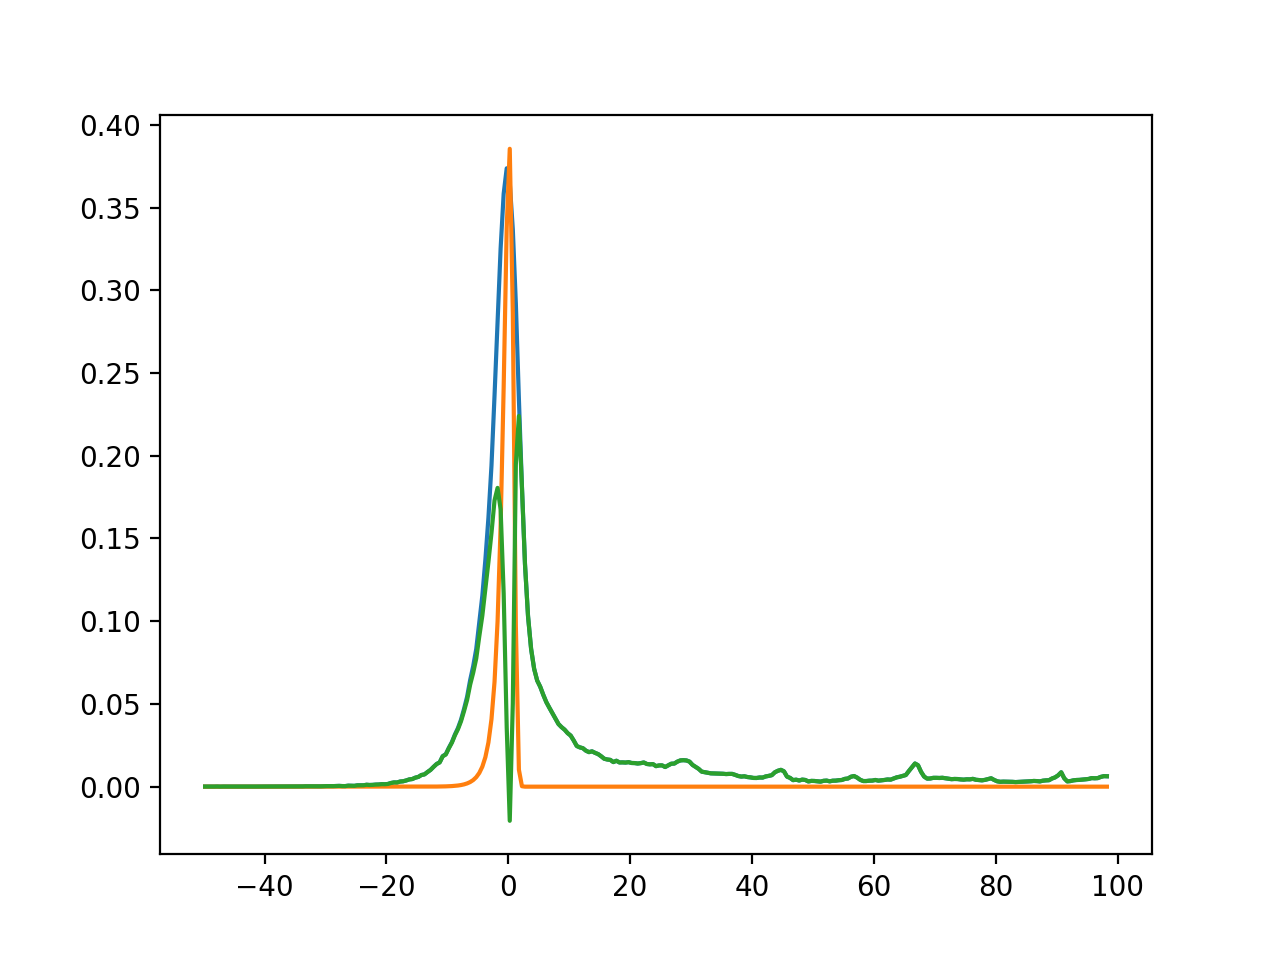

In [33]:
exp = data * 1e-6
plt.figure()
plt.plot(x, exp)
model = icg.resolution(x, Ei=Ei, E0=E0, geom=geom, **out.params)*5
plt.plot(x, model)a
residual = exp - model
plt.plot(x, residual)

Does not fit well

In [48]:
params = lmfit.Parameters()
# at first the max was 1.0. after trying it, it seems better to set max to 0.6 because points outside the range look like outliers
params.add('a', min=0., max=.7)
# at first the max was 0.3. 
params.add('b', min=0., max=.5)
# params.add('R', value=0.3, vary=False)
params.add('R', min=0., max=.9)
params.add('sigma', min=0., max=100.)
params.add('t0', min=0., max=500.)

Ei = 100.
geom = icg.Geom(l1=11.6, l2=2.0, l3=3.)

In [51]:
x0 = pk_56.energy
data0 = pk_56.I
x = np.arange(x0[0], x0[-1], 0.1)
data = np.interp(x, x0, data0)
eps_data = 1.
E0 = 56.6
# fit
out = lmfit.minimize(fit.residual, params, args=(x, data, eps_data, geom, Ei, E0), method='differential_evolution')

/home/lj7/miniconda2/envs/dev-mcvine/lib/python2.7/site-packages/dgsres-0.0.1a1-py2.7.egg/dgsres/icg.py:57: RuntimeWarning: invalid value encountered in add
/home/lj7/miniconda2/envs/dev-mcvine/lib/python2.7/site-packages/dgsres-0.0.1a1-py2.7.egg/dgsres/powder/fit.py:70: RuntimeWarning: invalid value encountered in divide


In [54]:
out.params

Parameters([('a', <Parameter 'a', 0.19669850059469343, bounds=[0.0:0.7]>),
            ('b', <Parameter 'b', 0.21259461710125138, bounds=[0.0:0.5]>),
            ('R', <Parameter 'R', 0.014487393557880817, bounds=[0.0:0.9]>),
            ('sigma',
             <Parameter 'sigma', 62.612264767112748, bounds=[0.0:100.0]>),
            ('t0', <Parameter 't0', 390.71098105276889, bounds=[0.0:500.0]>)])

<IPython.core.display.Javascript object>


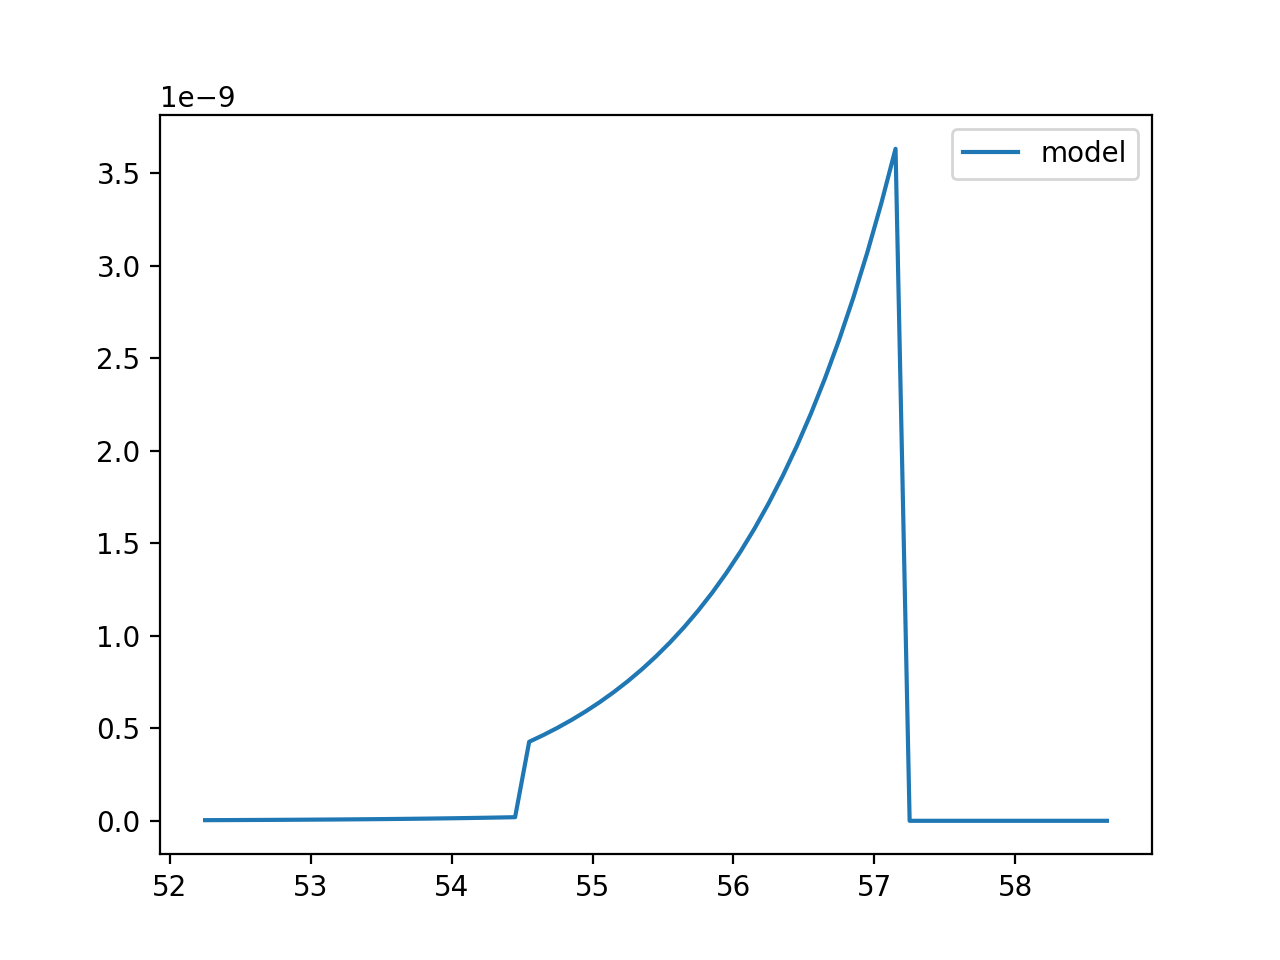

In [55]:
exp = data * 1e-6
plt.figure()
# plt.plot(x, exp, label='exp')
model = icg.resolution(x, Ei=Ei, E0=E0, geom=geom, **out.params)*5
plt.plot(x, model, label='model')
residual = exp - model
# plt.plot(x, residual)
plt.legend()